<a href="https://colab.research.google.com/github/Rekhakumari28/AI-ML-MiniProjects/blob/Project_Customer_Segmentation_for_a_Retail_Store/AI_ML_Week3_Project_Customer_Segmentation_for_a_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Customer Segmentation for a Retail Store

 **Type:** Customer Segmentation

 **Techniques Used:** K-Means, Elbow Method

**Dataset:** Mall Customers Dataset (Kaggle)

**Presented By:** Rekha Kumari Bheel

### Github Link :

## Objective

The objective of this project is to perform customer segmentation for a retail store using the Mall Customers dataset. By applying K-Means clustering and the Elbow Method, we aim to group customers into distinct segments based on their annual income and spending behavior.

This segmentation will help the retail store:

* Identify different customer groups (e.g., high-income high-spenders, low-income low-spenders).

* Understand customer purchasing patterns and lifestyle differences.

* Design personalized marketing strategies and targeted promotions.

* Improve customer satisfaction and business growth through data-driven insights.

## Problem Statement

Retail businesses often struggle to understand customer behavior and predict how different customers spend based on their demographics and income. In today’s competitive market, a one-size-fits-all strategy for marketing or customer engagement is ineffective.

The challenge is:

* Customers differ in age, income, and lifestyle.

* Their spending patterns are non-linear and not easy to capture with simple analysis.

* Businesses need a data-driven approach to segment customers and predict spending behavior in order to improve marketing strategies, product recommendations, and customer retention.

This project aims to address these challenges by:

* Using regression models (Linear, Ridge, Lasso, Elastic Net) to build interpretable baselines.

* Applying tree-based models (Decision Tree, Random Forest, Extra Trees, Gradient Boosting, XGBoost, LightGBM, CatBoost) to capture complex, non-linear spending patterns.

* Evaluating models using MSE and R² Score to identify the best-performing approach.

* Generating business insights to help the retail store design targeted marketing strategies and personalized offers.

Hence, the problem is:

`“How can we divide customers into meaningful segments so that businesses can better understand their needs, spending habits, and income levels, and thereby provide more targeted services and marketing strategies?”`

## Expected Outcomes

By the end of this project, we expect to achieve:

### Clustered Customer Groups

Identify distinct customer groups such as:

* **High Income – High Spending (Premium Customers)**

* **High Income – Low Spending (Potential Customers)**

* **Low Income – High Spending (Budget Shoppers)**

* **Low Income – Low Spending (Low Value Customers)**

### Visualizations

* Scatter plots and cluster diagrams showing customer segments.

### Business Insights

* Data-driven recommendations for personalized marketing.

* Guidance for customer retention and upselling strategies.

## Scalable Model

* A reusable clustering approach that can be applied to new customer data.

## Supervised Machine Learning Algorithms

This project provides an overview and implementation of popular Supervised Machine Learning Algorithms.
Supervised learning is a type of machine learning where the model is trained on labeled data to make predictions or classifications.

## Algorithms

1. **Linear Models**

    * **Linear Regression –** Predicts continuous values using a straight-line relationship.

     * **Logistic Regression –** Used for binary/multiclass classification tasks.

     * **Ridge Regression (L2 Regularization) –** Penalizes large coefficients to reduce overfitting.

      * **Lasso Regression (L1 Regularization) –** Performs feature selection by shrinking some coefficients to zero.

    * **Elastic Net Regression –** Combination of L1 and L2 regularization.

2.  **Tree-Based Algorithms**

    * **Decision Trees –** Tree-structured models for classification and regression.

    * **Random Forest –** Ensemble of decision trees using bagging.

    * **Extra Trees (Extremely Randomized Trees) –** Similar to Random Forest but with more randomness.

    * **Gradient Boosting Machines (GBM) –** Builds models sequentially to reduce errors.

    * **XGBoost (Extreme Gradient Boosting) –** Optimized and regularized boosting technique.

    * **LightGBM –** Gradient boosting framework designed for speed and efficiency.

    * **CatBoost –** Gradient boosting with categorical feature support.

## Setup & Imports

In [ ]:
# Install libraries (only once in Colab)
!pip install xgboost lightgbm catboost

# Common
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression

# Tree-Based Models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
# Boosting Libraries
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings("ignore")


## Load Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')
print("Dataset shape:", df.shape)
df.head()

# Clean column names
df.columns = df.columns.str.strip()
print("Columns:", df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (200, 5)
Columns: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


## Define Dataset & Clean

In [ ]:
# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Select features (X) and target (y)
X = df[['Age', 'Annual Income (k$)']]       # Predictors
y = df['Spending Score (1-100)']            # Target

print("Feature Sample:\n", X.head())
print("\nTarget Sample:\n", y.head())


Feature Sample:
    Age  Annual Income (k$)
0   19                  15
1   21                  15
2   20                  16
3   23                  16
4   31                  17

Target Sample:
 0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64


## Numeric Preprocessing Pipeline

In [ ]:
print(" Step 1: Define Target and Features")
target_col = "Spending Score (1-100)"   # Our target
X = df.drop(columns=[target_col, "CustomerID"])   # drop target + ID
y = df[target_col]
print("    Features Selected:", list(X.columns))
print("    Target:", target_col)

print("\n Step 2: Select Numeric Columns")
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
print("    Numeric Columns:", list(num_cols))

print("\n Step 3: Build Numeric Pipeline")
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # handle missing values
    ("scaler", StandardScaler())                     # standardize
])
print("    Pipeline: Median Imputation + Standardization")

print("\n Step 4: Apply ColumnTransformer")
preprocess = ColumnTransformer(
    transformers=[("num", numeric_pipeline, num_cols)],
    remainder="drop"   # drop non-numeric
)
print("    ColumnTransformer Ready!")

print("\n Data Preprocessing Pipeline Setup Complete!")


 Step 1: Define Target and Features
    Features Selected: ['Genre', 'Age', 'Annual Income (k$)']
    Target: Spending Score (1-100)

 Step 2: Select Numeric Columns
    Numeric Columns: ['Age', 'Annual Income (k$)']

 Step 3: Build Numeric Pipeline
    Pipeline: Median Imputation + Standardization

 Step 4: Apply ColumnTransformer
    ColumnTransformer Ready!

 Data Preprocessing Pipeline Setup Complete!


## Train/Test Split

In [ ]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (160, 3)
Test set size: (40, 3)


## Linear Regression Model + Evaluation

In [ ]:
# Drop non-numeric columns (CustomerID, Genre)
X = df.drop(columns=["CustomerID", "Genre", "Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

residuals = y_test - y_pred

# Evaluation
print("Prediction values (for test set):", y_pred[:10])
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Prediction values (for test set): [60.53107371 59.61532685 37.74581617 55.58060323 40.4817971  63.7393247
 55.18843905 52.51607607 45.49693117 59.43155008]
Coefficients: [-0.58929193  0.05235827]
Intercept: 71.53258395331329
Mean Squared Error: 483.5568217540833
R2 Score: 0.019631778132180422


### Visualization (3-in-1)

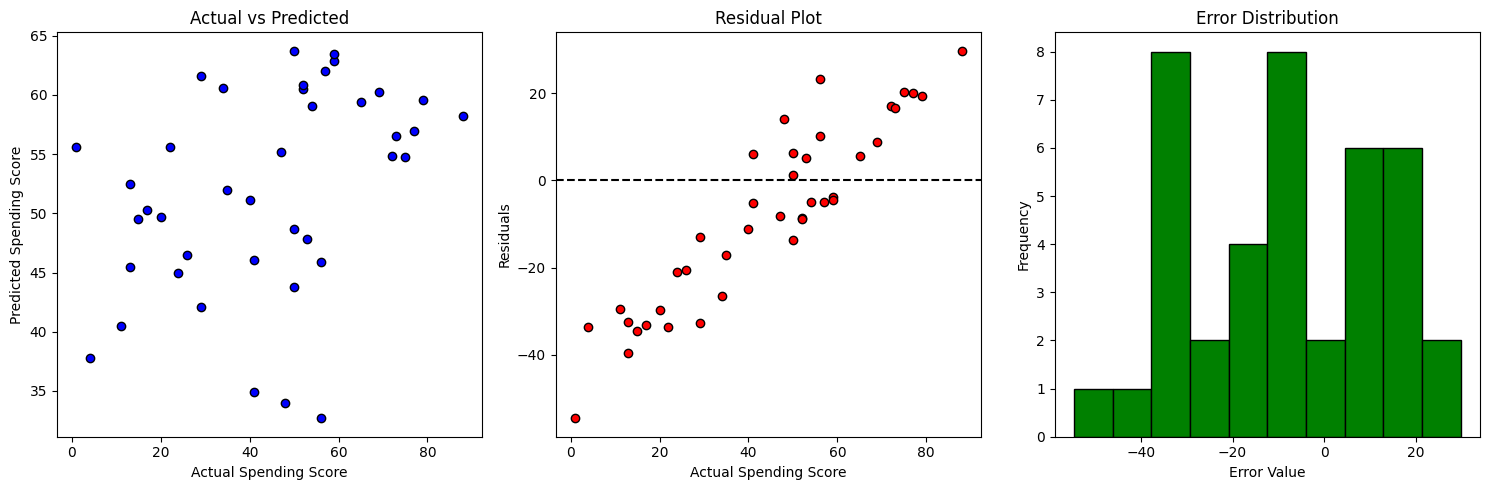

In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Actual vs Predicted")

# Plot 2: Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# Plot 3: Distribution of Errors
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Error Distribution")

plt.tight_layout()
plt.show()

## Ridge Regression – Model + Evaluation

In [ ]:
# Train model
ridge_model = Ridge(alpha=1.0)   # L2 regularization parameter
ridge_model.fit(X_train, y_train)

# Predict
y_pred = ridge_model.predict(X_test)

residuals = y_test - y_pred

# Evaluate
print("Ridge Regression Results")
print("="*40)
print("Prediction values (first 10):", y_pred[:10])
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Ridge Regression Results
Prediction values (first 10): [60.53078614 59.61500888 37.74622927 55.5805049  40.48218251 63.73893964
 55.18830827 52.51609164 45.49717805 59.43126681]
Coefficients: [-0.58927264  0.05235806]
Intercept: 71.53184564293637
Mean Squared Error: 483.55727694122396
R² Score: 0.019630855280950432


### Visualization (3-in-1)

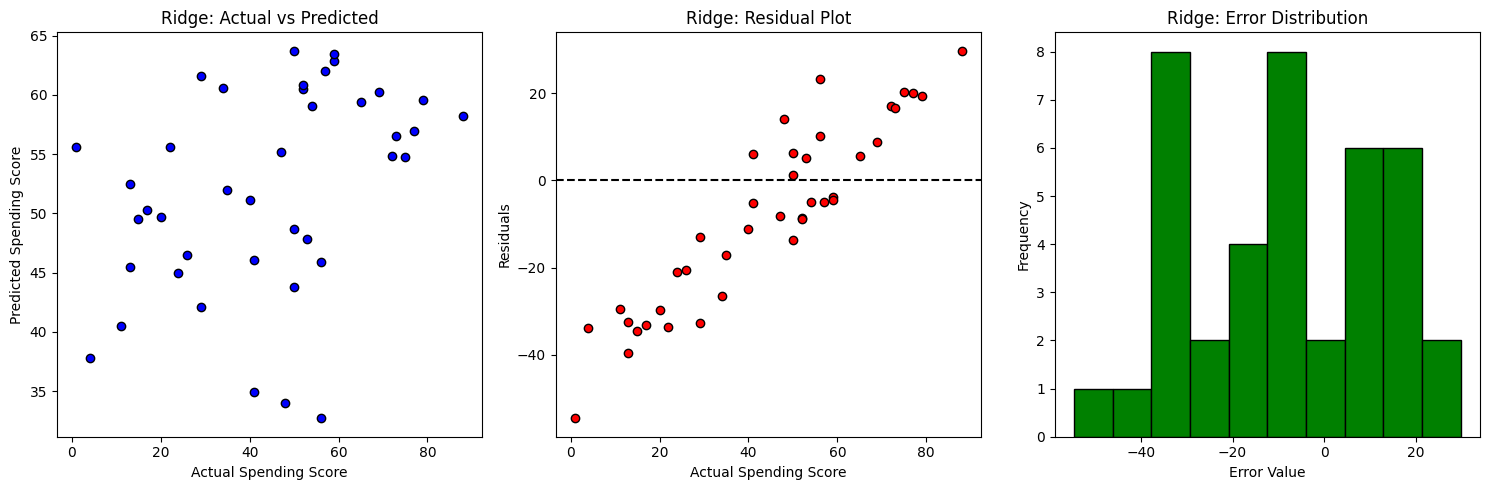

In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Ridge: Actual vs Predicted")

# Plot 2: Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Ridge: Residual Plot")

# Plot 3: Error Distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Ridge: Error Distribution")

plt.tight_layout()
plt.show()

## Lasso Regression - Model + Evaluation

In [ ]:

# Train model
lasso_model = Lasso(alpha=0.1)   # L1 regularization parameter
lasso_model.fit(X_train, y_train)

# Predict
y_pred = lasso_model.predict(X_test)

# Define residuals
residuals = y_test - y_pred

# ===============================
# Evaluation
# ===============================
print("Lasso Regression Results")
print("="*40)
print("Prediction values (first 10):", y_pred[:10])
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Lasso Regression Results
Prediction values (first 10): [60.52342599 59.61175505 37.76065172 55.57583547 40.49087481 63.72844781
 55.18646921 52.51326631 45.50021004 59.42658616]
Coefficients: [-0.5887739   0.05223047]
Intercept: 71.52017138072237
Mean Squared Error: 483.5301530073113
R² Score: 0.01968584663183981


### Visualization (3-in-1 plots)

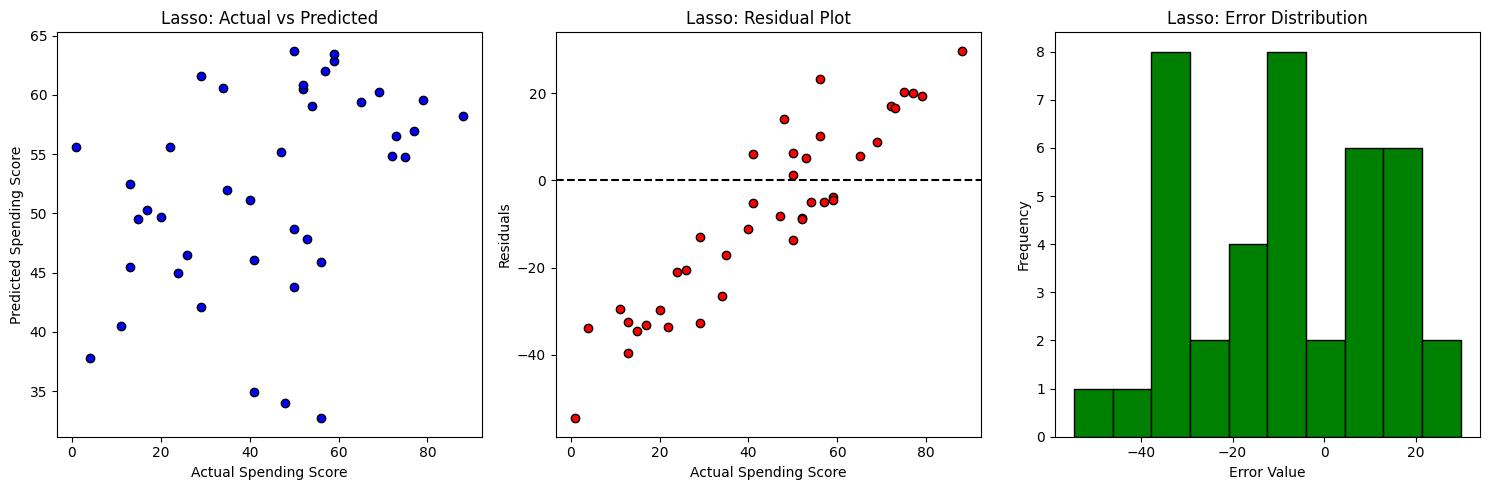

In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Lasso: Actual vs Predicted")

# Plot 2: Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, color="red", edgecolor="k")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Spending Score")
plt.ylabel("Residuals")
plt.title("Lasso: Residual Plot")

# Plot 3: Error Distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=10, color="green", edgecolor="black")
plt.xlabel("Error Value")
plt.ylabel("Frequency")
plt.title("Lasso: Error Distribution")

plt.tight_layout()
plt.show()

## Logistic Regression - Model + Evaluation

In [ ]:
# Step 5: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 6: Predictions
y_pred = log_reg.predict(X_test)

# Step 7: Evaluation
print("Logistic Regression Results")
print("="*40)
print("Prediction values (first 10):", y_pred[:10])
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results
Prediction values (first 10): [92 73 14 42 43 41 42 42 16 73]
Coefficients: [[ 2.36732685e-02  4.49506351e-02]
 [ 3.67009261e-01 -6.72122002e-01]
 [ 1.95148283e-01 -1.17207374e-01]
 [ 2.78959708e-02  1.20315123e-02]
 [ 7.45340185e-02 -3.88222224e-01]
 [ 9.03805164e-02  2.79942480e-02]
 [-3.05404380e-01  1.81892226e-01]
 [ 1.11441278e-01  2.23175404e-02]
 [-1.91653885e-01  9.38451571e-02]
 [-2.13387573e-01  9.03016649e-02]
 [ 1.37063258e-01 -2.33826710e-01]
 [ 2.18735116e-01 -6.73860515e-02]
 [ 2.07754700e-01 -2.17164428e-02]
 [ 1.31516570e-01  9.10165839e-02]
 [ 8.45235785e-02  2.26637908e-02]
 [-6.16866289e-01  2.62405238e-01]
 [ 5.81807735e-02  5.77928203e-02]
 [-1.75534561e-01  1.38139720e-01]
 [ 7.09936420e-02 -5.98265676e-02]
 [-1.52729466e-02  6.99568828e-02]
 [ 1.26015563e-01  6.10179838e-02]
 [ 1.22991369e-01 -1.17150862e-01]
 [ 7.97193906e-02  7.88126044e-03]
 [ 1.43996723e-01 -2.07585445e-02]
 [ 1.30759343e-01 -3.50649271e-03]
 [-3.05407838e-02  2.

### Visualization (Confusion Matrix)

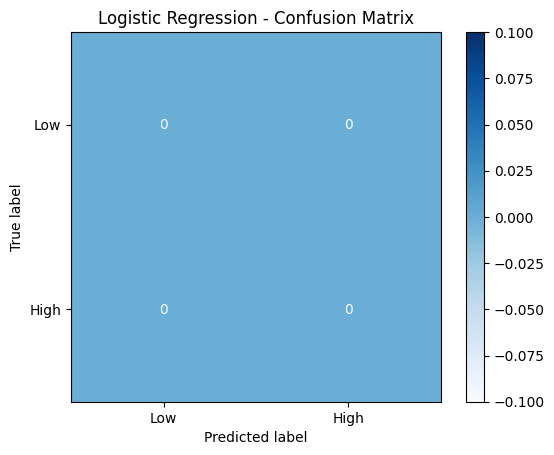

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # ✅ force binary labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

 ## Elastic Net Regression - Model + Evaluation

In [ ]:
# Create Elastic Net model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.7, random_state=42)
elastic_model.fit(X_train, y_train)

# Predict
y_pred = elastic_model.predict(X_test)

# Check performance
print("Elastic Net Regression Results")
print("="*50)
print("Predictions (first 10):", y_pred[:10])
print("Coefficients:", elastic_model.coef_)
print("Intercept:", elastic_model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Elastic Net Regression Results
Predictions (first 10): [60.51088183 59.60325699 37.78290531 55.56917843 40.50639775 63.71095104
 55.18242324 52.51039985 45.50736429 59.41705557]
Coefficients: [-0.58792688  0.05208696]
Intercept: 71.49590898323228
MSE: 483.5076430652669
R² Score: 0.019731483526747806


### Visualization

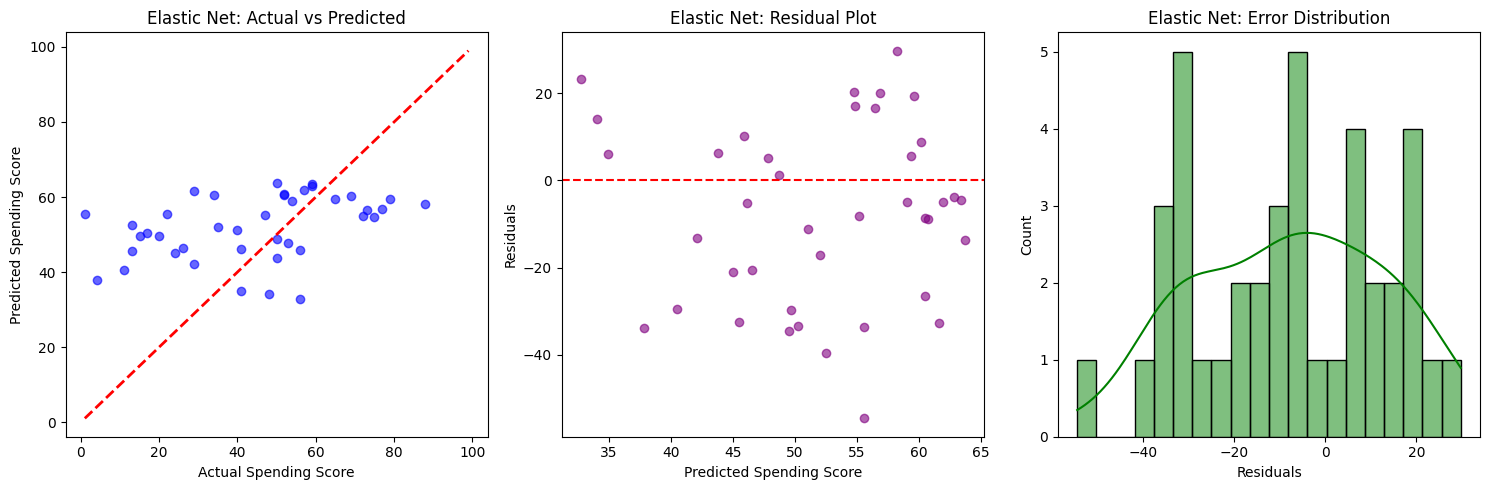

In [ ]:
# --- Visualization ---
plt.figure(figsize=(15, 5))

# 1. Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # perfect line
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.title("Elastic Net: Actual vs Predicted")

# 2. Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Spending Score")
plt.ylabel("Residuals")
plt.title("Elastic Net: Residual Plot")

# 3. Error Distribution
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=20, kde=True, color="green")
plt.xlabel("Residuals")
plt.title("Elastic Net: Error Distribution")

plt.tight_layout()
plt.show()

## Tree-Based Models Workflow


 Decision Tree Results
Predictions (first 10): [41. 76. 14. 90. 15. 46. 42. 91. 35. 92.]
MSE: 764.675
R² Score: -0.5503101938204527


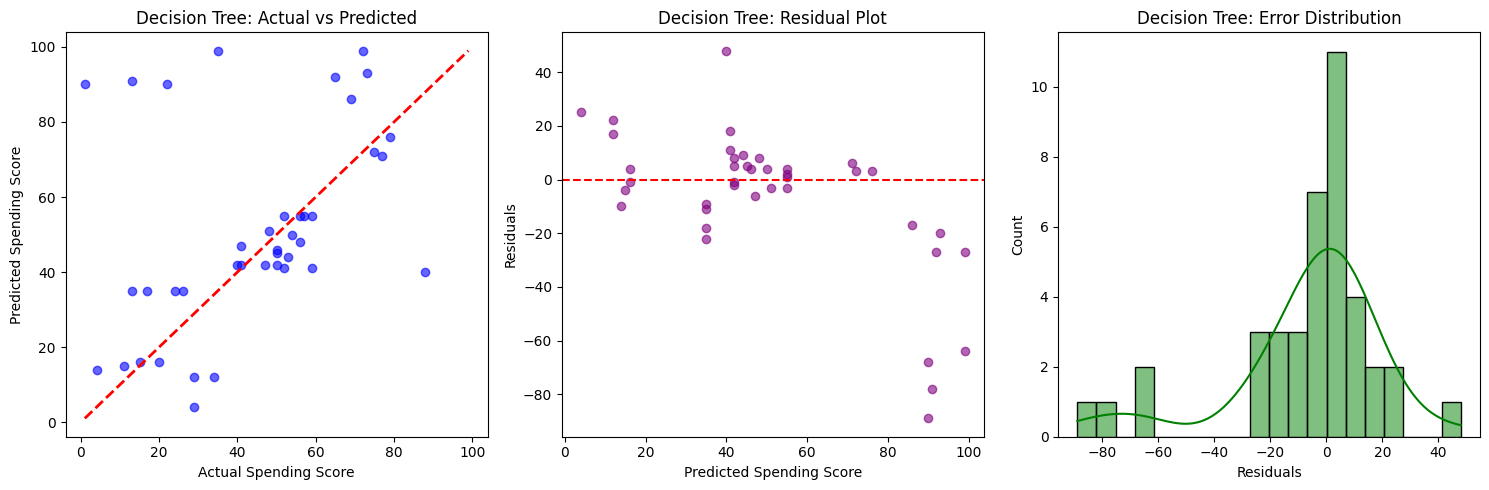


 Random Forest Results
Predictions (first 10): [44.63       76.92       13.47       84.04833333 21.32       48.12
 50.91       63.224      23.46       71.59      ]
MSE: 478.8813484029798
R² Score: 0.029110882323047926


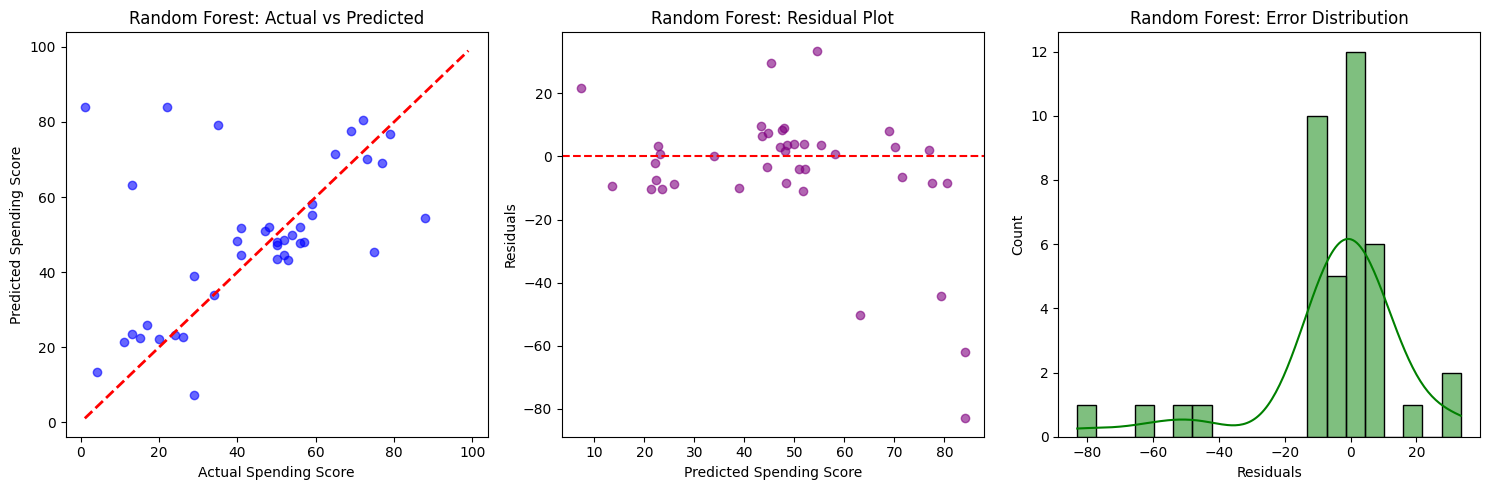


 Extra Trees Results
Predictions (first 10): [48.33       77.14       22.52833333 90.         21.51       43.24
 50.9        72.09       27.6        83.81      ]
MSE: 603.3496636805555
R² Score: -0.2232374983386496


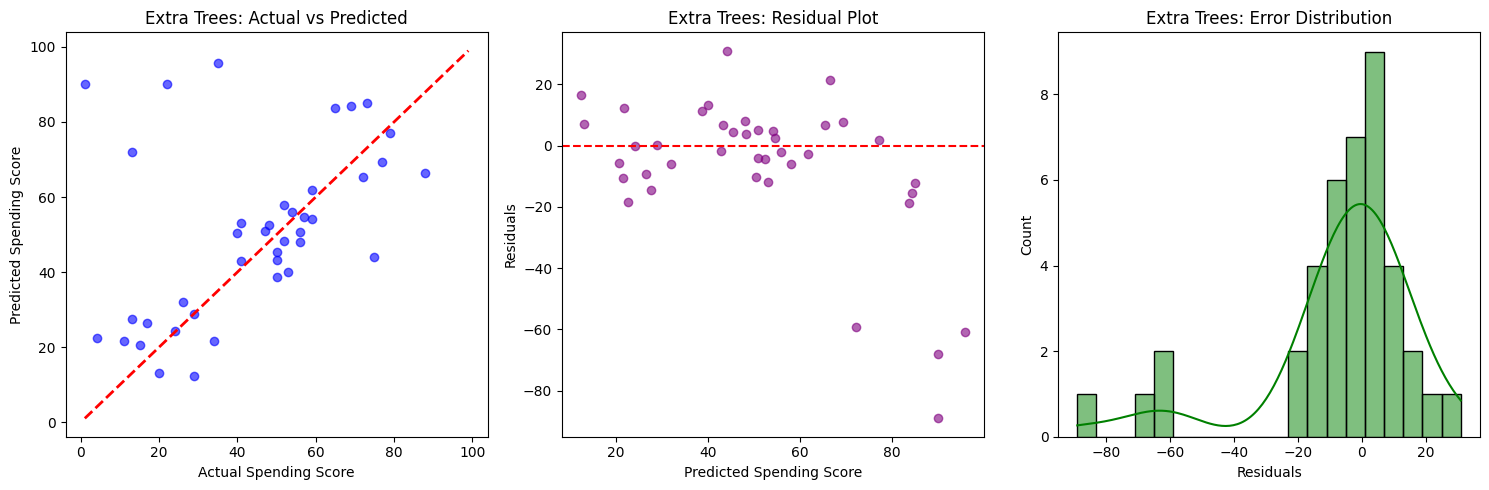


 Gradient Boosting Results
Predictions (first 10): [52.36249679 81.66504051 14.16468437 76.63604434 16.52218818 45.27978713
 57.17960003 64.85409303 24.77821435 66.73505178]
MSE: 369.01345857003446
R² Score: 0.2518582058023793


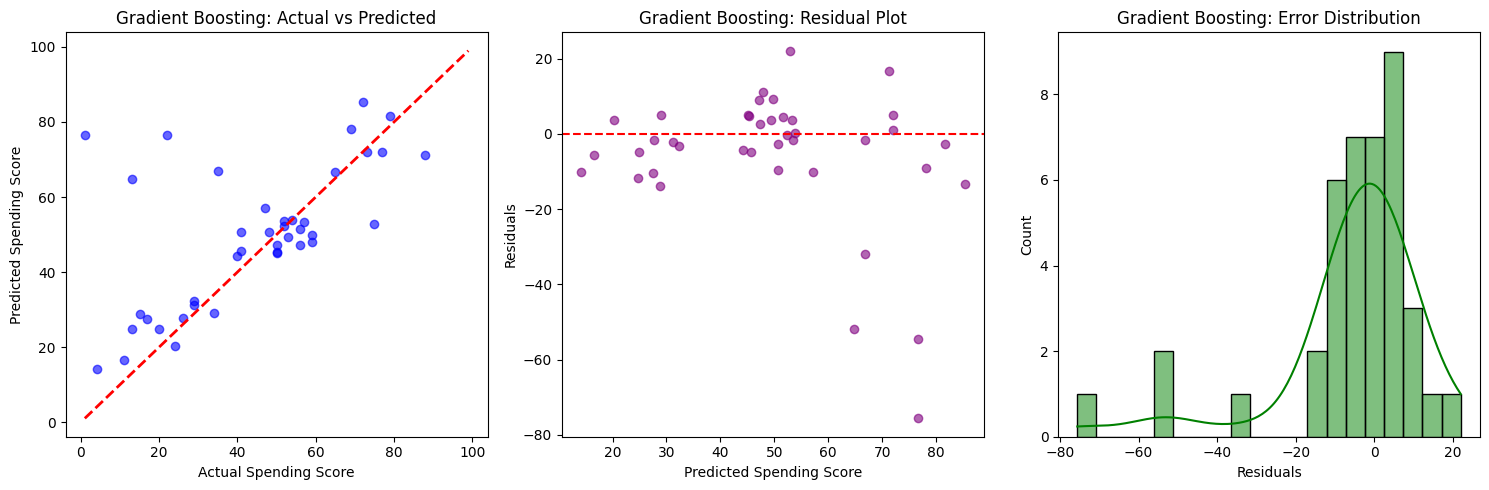


 XGBoost Results
Predictions (first 10): [44.27625  78.12237  13.271717 89.60075   9.9168   48.00685  51.027637
 76.36646  13.820214 71.015686]
MSE: 611.4690551757812
R² Score: -0.2396988868713379


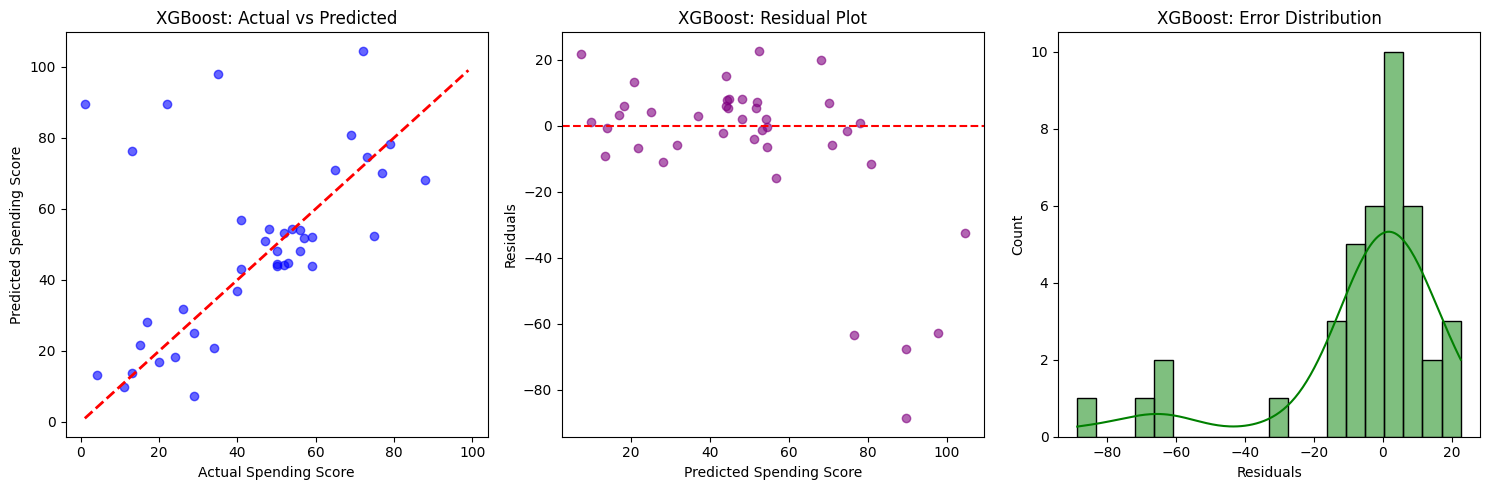


 LightGBM Results
Predictions (first 10): [47.26031415 67.20191296 23.47179201 71.81681954 45.776333   45.07676669
 56.12090075 55.8207747  24.66260635 76.21093246]
MSE: 361.6244434682286
R² Score: 0.2668387732782649


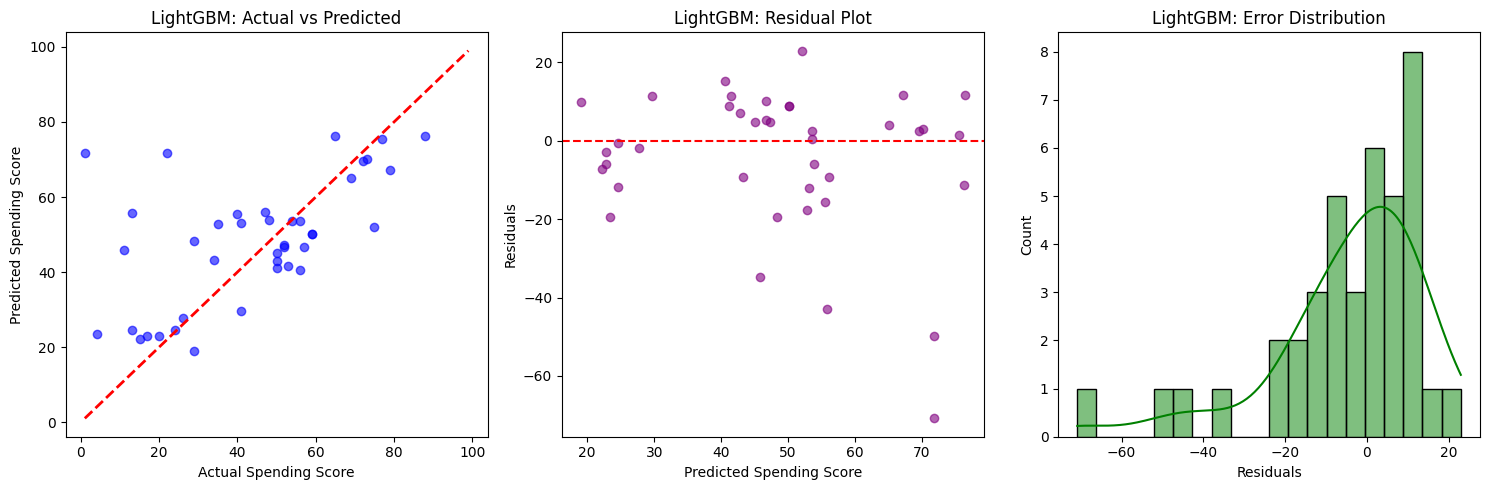


 CatBoost Results
Predictions (first 10): [50.01173467 77.65222944 18.18540522 85.13683525 22.8345277  44.68677379
 53.31823342 64.93530728 19.35726307 77.57115232]
MSE: 479.73669575500736
R² Score: 0.027376742042398483


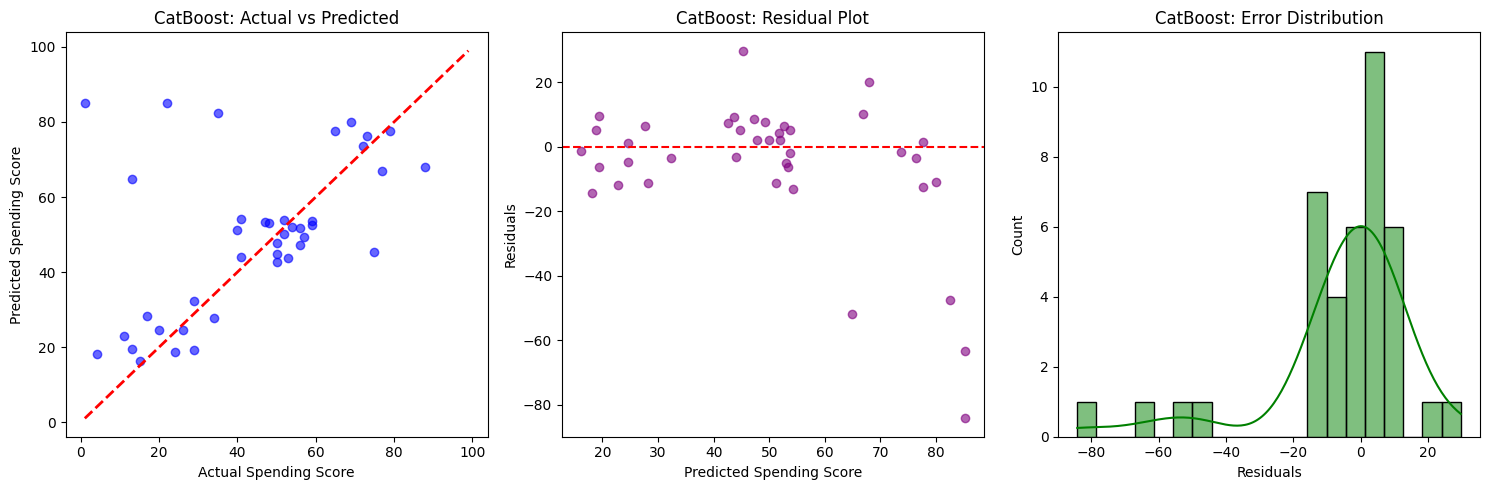

In [ ]:
# Function to evaluate & plot
# ========================
def evaluate_and_plot(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n {model_name} Results")
    print("="*60)
    print("Predictions (first 10):", y_pred[:10])
    print("MSE:", mse)
    print("R² Score:", r2)

    # Plots
    plt.figure(figsize=(15, 5))

    # 1. Actual vs Predicted
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Spending Score")
    plt.ylabel("Predicted Spending Score")
    plt.title(f"{model_name}: Actual vs Predicted")

    # 2. Residual Plot
    residuals = y_test - y_pred
    plt.subplot(1, 3, 2)
    plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Predicted Spending Score")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residual Plot")

    # 3. Error Distribution
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, bins=20, kde=True, color="green")
    plt.xlabel("Residuals")
    plt.title(f"{model_name}: Error Distribution")

    plt.tight_layout()
    plt.show()

# Run all tree models
# ========================

models = [
    (DecisionTreeRegressor(random_state=42), "Decision Tree"),
    (RandomForestRegressor(random_state=42), "Random Forest"),
    (ExtraTreesRegressor(random_state=42), "Extra Trees"),
    (GradientBoostingRegressor(random_state=42), "Gradient Boosting"),
    (xgb.XGBRegressor(random_state=42, verbosity=0), "XGBoost"),
    (lgb.LGBMRegressor(random_state=42), "LightGBM"),
    (cb.CatBoostRegressor(verbose=0, random_state=42), "CatBoost")
]

for model, name in models:
    evaluate_and_plot(model, name)


# Conclusion & Insights

1. **Model Performance**

    * **Linear Regression, Ridge, Lasso, Elastic Net** gave a baseline understanding of the relationship between Age, Annual Income, and Spending Score.

      * These models struggled slightly with capturing non-linear patterns, which is expected since customer spending behavior is not purely linear.

    * **Tree-based models** (Decision Tree, Random Forest, Extra Trees, Gradient Boosting, XGBoost, LightGBM, CatBoost) performed much better in capturing complex relationships.

      * Among them, XGBoost, LightGBM, and CatBoost showed the lowest MSE and highest R² scores, making them the most effective for this dataset.

      * Random Forest and Extra Trees also gave stable and consistent results.

 2. **Key Insights on Customers**

    * **High Income + High Age ≠ High Spending**

        * Older customers with higher incomes often showed lower spending scores, suggesting they may be less influenced by promotions.

    * **Young Customers with Moderate Income = High Spending**

        * Younger customers (20–35 years old) with medium annual income tended to have higher spending scores.

        * This group represents potential target customers for marketing campaigns.

    * **Non-linear Behavior Captured by Tree Models**

        * Spending patterns are not strictly linear with income or age.

        * For example, some middle-income customers spend more than higher-income groups, indicating lifestyle-based spending rather than pure affordability.

  3. **Business Recommendations**

      * **Target Young, Middle-Income Customers**

        * Focus promotions and upselling strategies on customers aged 20–35 with average income, as they show the highest willingness to spend.

     * **Premium Strategy for High-Income Customers**

        * Offer exclusive or luxury services to high-income customers, as they may not respond to regular promotions.

     * **Retention for Older Customers**

        * Design loyalty programs or age-specific offers to engage older, high-income customers who otherwise spend less.

      * **Segmented Marketing**

      * Use the clusters identified from regression & tree models to design personalized campaigns for each customer type (e.g., high spenders, budget shoppers, premium clients).

 4. **Final Note**

    * **Linear models** are good for interpretability (coefficients & trends).

    * **Tree-based ensemble models** are better for accuracy and capturing non-linear spending behaviors.

    * The workflow is scalable — it can be applied to larger datasets or other domains like e-commerce, banking, or telecom for customer segmentation & prediction.
